In [65]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from orbit.models.dlt import ETSFull
from orbit.diagnostics.plot import plot_predicted_data

In [66]:
data = pd.read_csv("../data/summer.csv", index_col=0, parse_dates=['time'])
#data = pd.read_csv("../data/summer.csv", index_col=0)

In [67]:
df = pd.DataFrame(data)
df

,time,price
0,2021-06-01 04:00:00+00:00,125.00
1,2021-06-01 04:15:00+00:00,125.17
2,2021-06-01 04:30:00+00:00,125.20
3,2021-06-01 04:45:00+00:00,125.30
4,2021-06-01 05:00:00+00:00,125.38
...,...,...
4720,2021-08-27 21:30:00+00:00,148.42
4721,2021-08-27 21:45:00+00:00,148.47
4722,2021-08-27 22:00:00+00:00,148.47
4723,2021-08-27 22:15:00+00:00,148.44


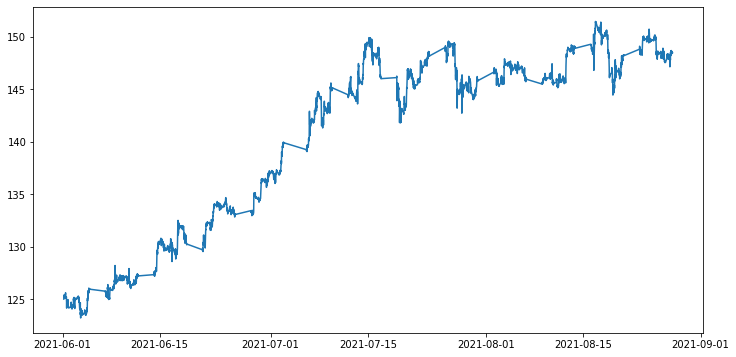

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['time'], df['price'])
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(df['time']) / 7))
plt.show()

In [69]:
df['time'] = pd.to_numeric(df['time'])


test_size = 65
train = df[:-test_size]
test = df[-test_size:]
train.dtypes

time       int64
price    float64
dtype: object

In [70]:
#dlt = DLTFull(response_col=response_col, date_col=date_col)
ets = ETSFull(
    response_col='price',
    date_col='time',
    seasonality=52,
    seed=8888,
)

In [71]:
%%time

ets.fit(train)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Wall time: 33.6 s


In [72]:
predicted_df = ets.predict(test)

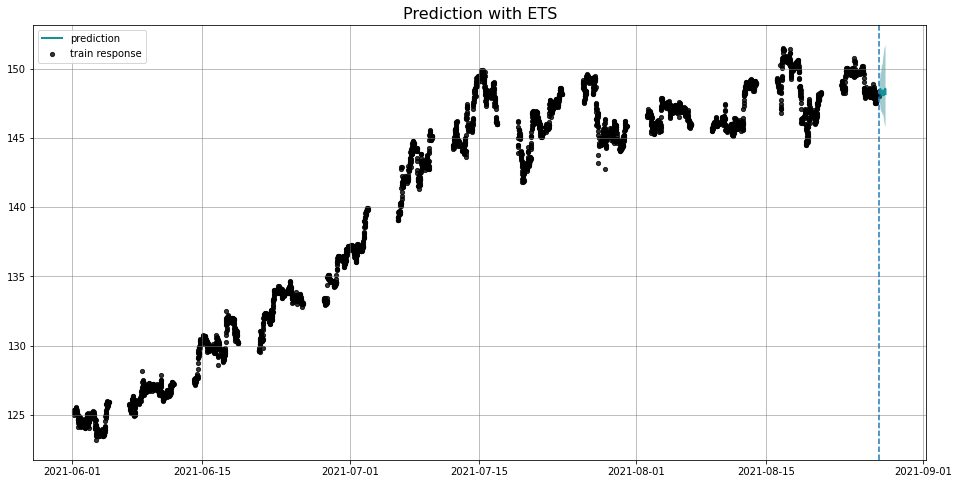

In [74]:
_ = plot_predicted_data(train, predicted_df, 'time', 'price', title='Prediction with ETS')

In [80]:
predicted_df['time'] = pd.to_datetime(predicted_df['time'])
predicted_df

,time,prediction_5,prediction,prediction_95
0,2021-08-27 06:30:00,147.928060,148.312001,148.687252
1,2021-08-27 06:45:00,147.710545,148.270929,148.914514
2,2021-08-27 07:00:00,147.720883,148.303769,148.870354
3,2021-08-27 07:15:00,147.597497,148.254012,149.120185
4,2021-08-27 07:30:00,147.489415,148.336148,149.108729
...,...,...,...,...
60,2021-08-27 21:30:00,145.890007,148.495488,151.572486
61,2021-08-27 21:45:00,145.753500,148.551030,151.648721
62,2021-08-27 22:00:00,145.841555,148.470341,151.652794
63,2021-08-27 22:15:00,145.903900,148.291693,151.654705


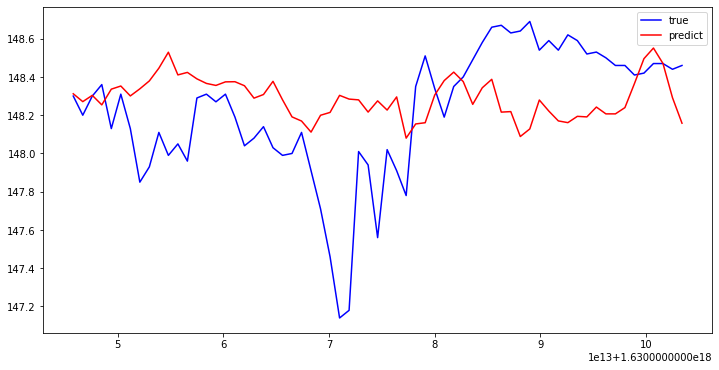

In [82]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test['time'], test['price'], c='b', label='true')
ax.plot(test['time'], predicted_df['prediction'], c='r', label='predict')
plt.legend()
plt.show()